In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
df = pd.read_csv("C:/Users/akash/Desktop/Project/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.describe().iloc[1::4]

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
mean,103.0,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.75122,13276.710571
50%,103.0,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.00000,10295.000000


#### We have noticable difference between mean = 13276.710571 and median = 10295.000000 for car price
 - Checking for outliers

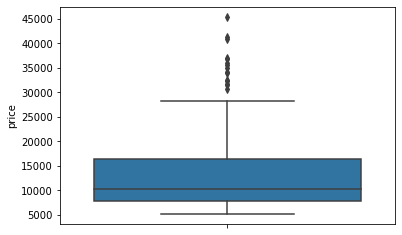

In [7]:
sns.boxplot(data = df , y = 'price')
plt.show()

#### Lets see what caused the high prices

In [8]:
IQR = df['price'].quantile(.75) - df['price'].quantile(.25)
upper_limit = df['price'].quantile(.75)+ (1.5*IQR)
df[df['price'] >= upper_limit]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
15,16,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0


In [9]:
print("Cant drop {} % of the data".format(round(15*100/205,2)))

Cant drop 7.32 % of the data


#### Also above cars are from luxury brand so it makes sense

#### Symboling is categorical value 

In [10]:
df['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [11]:
df.describe(include = 'object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


#### Variables that does not make much sense
 - Car ID , Carname , Symboling 
 - From Car name can get car company which will make difference as some company provide luxury cars.
 
#### Dropping Columns and adding car company name

In [12]:
df['CarCompanyName'] = df['CarName'].apply(lambda x : x.split(' ')[0])
df.drop(columns = ['car_ID','symboling','CarName'] , inplace = True)
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


#### Plotting the Numerical Features with respective Price

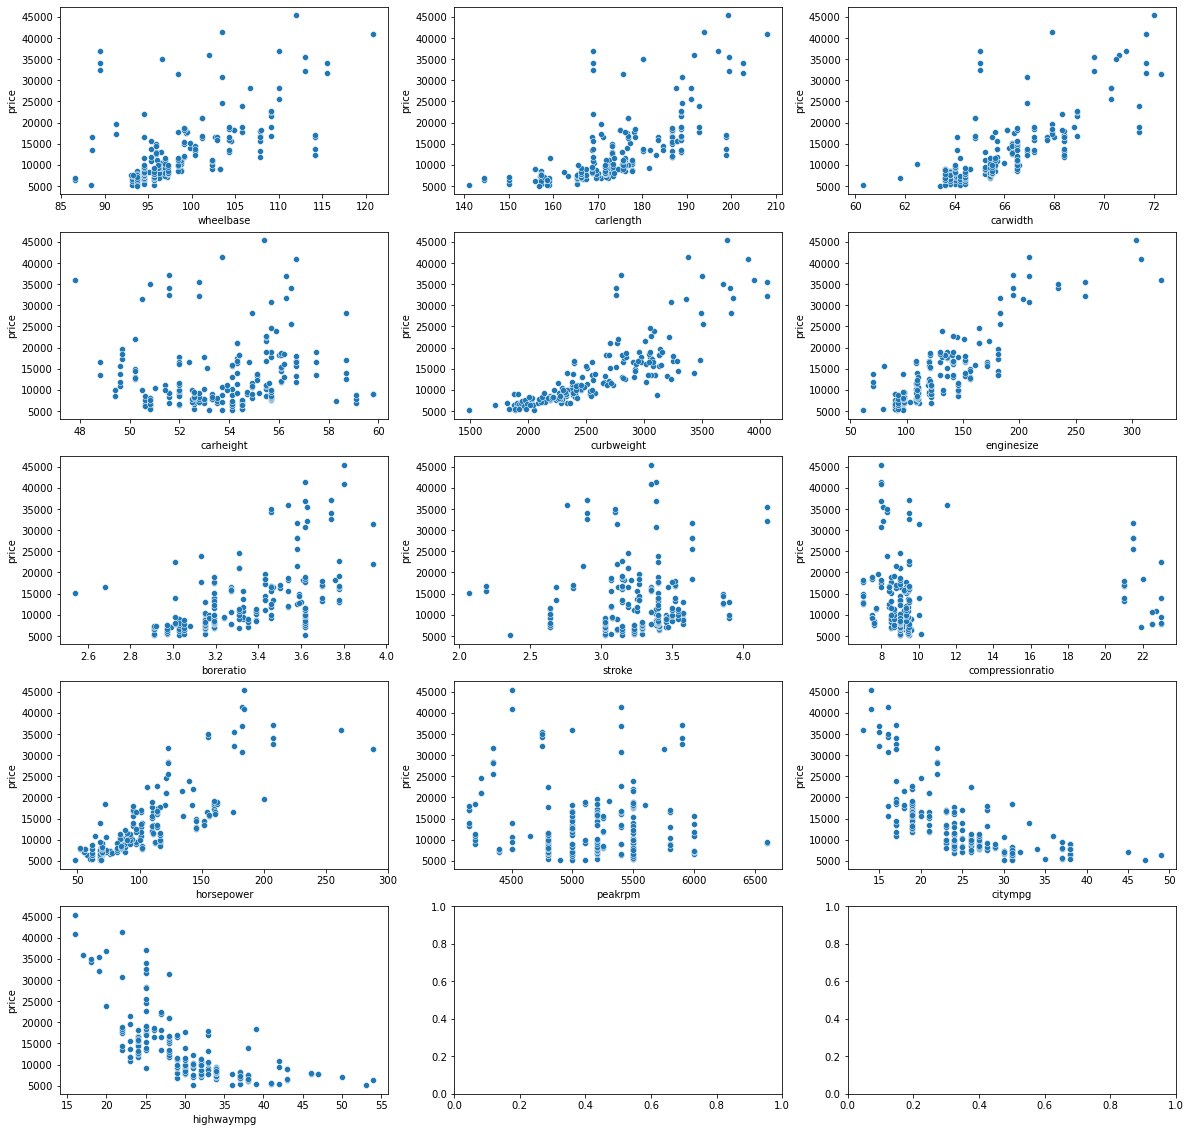

In [13]:
NumericalFeatures = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke'
                     ,'compressionratio','horsepower','peakrpm','citympg','highwaympg']
fig , axis = plt.subplots(nrows = 5 , ncols = 3 , figsize = [20, 20])
axis = axis.flat
index = 0
for i in NumericalFeatures:
    sns.scatterplot(data = df , x = i , y = 'price', ax = axis[index])
    index += 1

#### Derived 
 - wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower - These seems to have positive correlation
 - carheight,stroke,compressionratio,peakrpm - These seems to be all over the places not able to find relationship
 - citympg,highwaympg -  These seems to have negative correlation

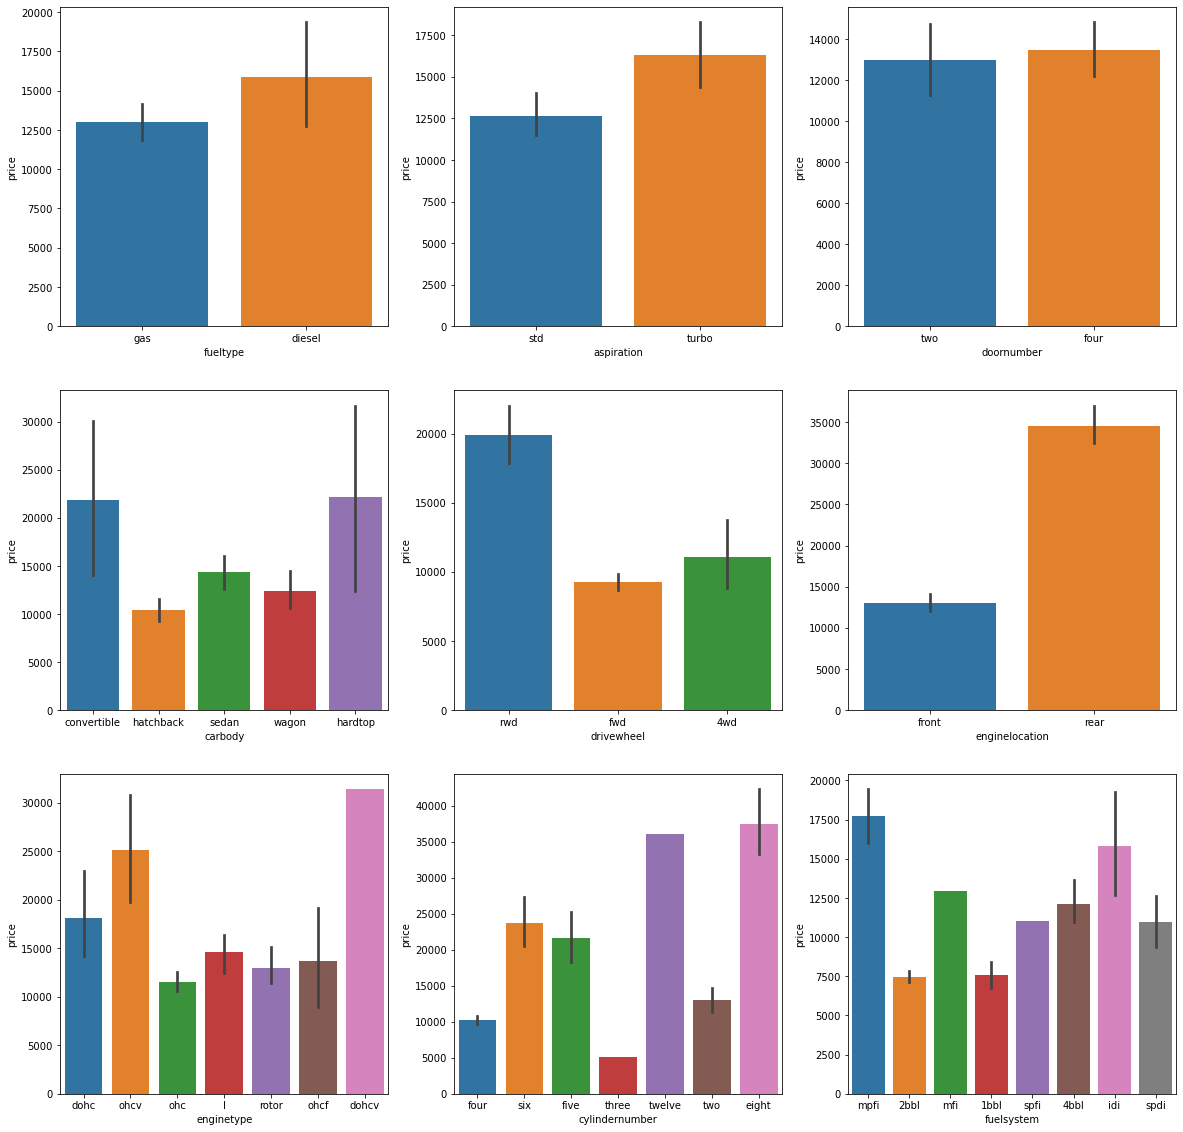

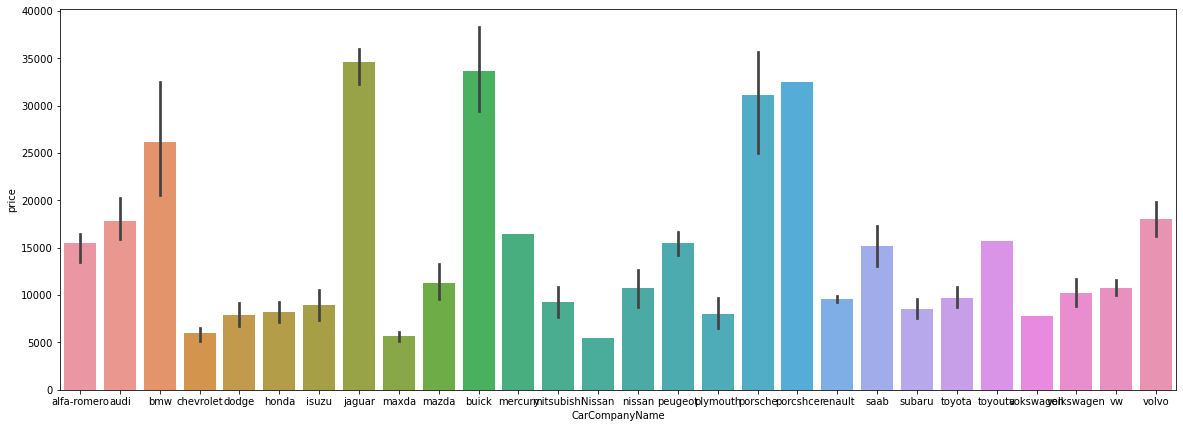

In [14]:
CategoricalFeatures = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype',
                        'cylindernumber','fuelsystem']
fig , axis = plt.subplots(nrows = 3 , ncols = 3 , figsize = [20, 20])
axis = axis.flat
index = 0
for i in CategoricalFeatures:
    sns.barplot(data = df , x = i , y = 'price', ax = axis[index],estimator=np.mean)
    index += 1
plt.show() 
plt.figure(figsize=(20,7))
sns.barplot(data = df , x = 'CarCompanyName' , y = 'price',estimator=np.mean)
plt.show()

#### Except for door number all other features shows noticeable variations against Price.
 - Lets confirm once we really have an variation between the variables by doing statistical testing.

#### Hypothesis Test : Here to compare 2 means lets perfoem T - Test
##### T- Test Assumption: 
 - Population has finite mean and standard deviation of price. So sample means will give gaussian as per CLT
 - All the prices are given independent of other cars

##### Defining Hypothesis
  - Null Hypothesis : Doornumber - 2 and Doornumber - 4 population mean are same
  - Alternative Hypothesis : Doornumber - 2 and Doornumber - 4 population mean are not same
  - Significance level = 5%

In [15]:
dfDoor2 = df[df['doornumber'] == 'two']
dfDoor4 = df[df['doornumber'] == 'four']
stats.ttest_ind(dfDoor2['price'],dfDoor4['price'])

Ttest_indResult(statistic=-0.4538127430553335, pvalue=0.6504483953299085)

#### P-Value is by far grater than 0.05 , so Accepting Null Hypothesis - Implies not much variave in doornumber coloumn

#### Features which is not providing much variance to Price
 - carheight,stroke,compressionratio,peakrpm,doornumber

##### Checking above statement with Lasso Regression (Feature selection)

### Pre-Processing
#### Categorical Encoding

In [16]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [17]:
df.describe(include = 'object')

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarCompanyName
count,205,205,205,205,205,205,205,205,205,205
unique,2,2,2,5,3,2,7,7,8,28
top,gas,std,four,sedan,fwd,front,ohc,four,mpfi,toyota
freq,185,168,115,96,120,202,148,159,94,31


#### Fueltype ,Aspiration ,Doornumber ,enginelocation,drivewheel --- These can be done one hot encoding
 - As features other features are have categories greater than 3 and we already have more number of features so avoiding to increase it.

In [18]:
hot_encoding = ['fueltype','aspiration','doornumber','enginelocation','drivewheel']
for col in hot_encoding:
    encoded = pd.get_dummies(df[col]).iloc[:,:-1]
    df = pd.concat([df,encoded],axis = 1)
df.drop(columns = hot_encoding , inplace = True)
df.head()

,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,...,citympg,highwaympg,price,CarCompanyName,diesel,std,four,front,4wd,fwd
0,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,...,21,27,13495.0,alfa-romero,0,1,0,1,0,0
1,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,...,21,27,16500.0,alfa-romero,0,1,0,1,0,0
2,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,...,19,26,16500.0,alfa-romero,0,1,0,1,0,0
3,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,...,24,30,13950.0,audi,0,1,1,1,0,1
4,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,...,18,22,17450.0,audi,0,1,1,1,1,0


#### Re-Naming the features

In [19]:
df.columns = ['carbody', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'CarCompanyName', 'fueltype',
       'aspiration', 'doornumber_2OR4', 'enginelocation', '4wd', 'fwd']
df.head()

,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,...,citympg,highwaympg,price,CarCompanyName,fueltype,aspiration,doornumber_2OR4,enginelocation,4wd,fwd
0,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,...,21,27,13495.0,alfa-romero,0,1,0,1,0,0
1,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,...,21,27,16500.0,alfa-romero,0,1,0,1,0,0
2,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,...,19,26,16500.0,alfa-romero,0,1,0,1,0,0
3,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,...,24,30,13950.0,audi,0,1,1,1,0,1
4,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,...,18,22,17450.0,audi,0,1,1,1,1,0


#### Cylindernumber is ordinal feature so using Label Encoder

In [20]:
ordinal = OrdinalEncoder(categories = [['two','three','four','five','six','eight','twelve']])
df['cylindernumber'] = ordinal.fit_transform(df[['cylindernumber']])
df.head()

,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,...,citympg,highwaympg,price,CarCompanyName,fueltype,aspiration,doornumber_2OR4,enginelocation,4wd,fwd
0,convertible,88.6,168.8,64.1,48.8,2548,dohc,2.0,130,mpfi,...,21,27,13495.0,alfa-romero,0,1,0,1,0,0
1,convertible,88.6,168.8,64.1,48.8,2548,dohc,2.0,130,mpfi,...,21,27,16500.0,alfa-romero,0,1,0,1,0,0
2,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,4.0,152,mpfi,...,19,26,16500.0,alfa-romero,0,1,0,1,0,0
3,sedan,99.8,176.6,66.2,54.3,2337,ohc,2.0,109,mpfi,...,24,30,13950.0,audi,0,1,1,1,0,1
4,sedan,99.4,176.6,66.4,54.3,2824,ohc,3.0,136,mpfi,...,18,22,17450.0,audi,0,1,1,1,1,0


#### These features (carbody,enginetype,fuelsystem,CarCompanyName) have more categories so Target Encoding

In [21]:
df.describe(include = 'object')

,carbody,enginetype,fuelsystem,CarCompanyName
count,205,205,205,205
unique,5,7,8,28
top,sedan,ohc,mpfi,toyota
freq,96,148,94,31


In [22]:
target = 'carbody','enginetype','fuelsystem','CarCompanyName'
for col in target:
    encoded = df.groupby(col)['price'].transform('mean')
    df[col] = encoded
df.head()

,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,...,citympg,highwaympg,price,CarCompanyName,fueltype,aspiration,doornumber_2OR4,enginelocation,4wd,fwd
0,21890.500000,88.6,168.8,64.1,48.8,2548,18116.416667,2.0,130,17754.60284,...,21,27,13495.0,15498.333333,0,1,0,1,0,0
1,21890.500000,88.6,168.8,64.1,48.8,2548,18116.416667,2.0,130,17754.60284,...,21,27,16500.0,15498.333333,0,1,0,1,0,0
2,10376.652386,94.5,171.2,65.5,52.4,2823,25098.384615,4.0,152,17754.60284,...,19,26,16500.0,15498.333333,0,1,0,1,0,0
3,14344.270833,99.8,176.6,66.2,54.3,2337,11574.048426,2.0,109,17754.60284,...,24,30,13950.0,17859.166714,0,1,1,1,0,1
4,14344.270833,99.4,176.6,66.4,54.3,2824,11574.048426,3.0,136,17754.60284,...,18,22,17450.0,17859.166714,0,1,1,1,1,0


In [23]:
    ['carbody', 'wheelbase', 'enginetype', 'cylindernumber', 'fuelsystem',
       'boreratio', 'CarCompanyName', 'fueltype', 'aspiration',
       'enginelocation', '4wd', 'fwd', 'MPG']

['carbody',
 'wheelbase',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'boreratio',
 'CarCompanyName',
 'fueltype',
 'aspiration',
 'enginelocation',
 '4wd',
 'fwd',
 'MPG']

#### carheight,stroke,compressionratio,peakrpm,doornumber removing these columns and trying

In [24]:
df = df.drop(columns = ['carheight','stroke','compressionratio','peakrpm','doornumber_2OR4'],axis = 1)
df.head()

,carbody,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,CarCompanyName,fueltype,aspiration,enginelocation,4wd,fwd
0,21890.500000,88.6,168.8,64.1,2548,18116.416667,2.0,130,17754.60284,3.47,111,21,27,13495.0,15498.333333,0,1,1,0,0
1,21890.500000,88.6,168.8,64.1,2548,18116.416667,2.0,130,17754.60284,3.47,111,21,27,16500.0,15498.333333,0,1,1,0,0
2,10376.652386,94.5,171.2,65.5,2823,25098.384615,4.0,152,17754.60284,2.68,154,19,26,16500.0,15498.333333,0,1,1,0,0
3,14344.270833,99.8,176.6,66.2,2337,11574.048426,2.0,109,17754.60284,3.19,102,24,30,13950.0,17859.166714,0,1,1,0,1
4,14344.270833,99.4,176.6,66.4,2824,11574.048426,3.0,136,17754.60284,3.19,115,18,22,17450.0,17859.166714,0,1,1,1,0


#### Citympg and Highwaympg are highly correlated with each other

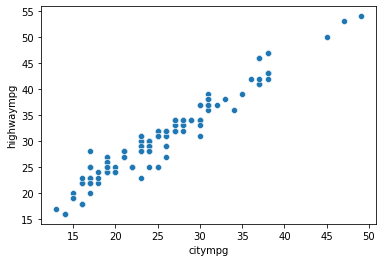

In [25]:
sns.scatterplot(data = df , x = 'citympg' , y = 'highwaympg')
plt.show()

#### Creating one feature out of city mpg and highway mpg

In [26]:
df['MPG'] = ((df['citympg'].mean() * df['citympg'])+(df['highwaympg'].mean() * df['highwaympg']))/(df['citympg'].mean()+df['highwaympg'].mean())
df.drop(columns = ['citympg' ,'highwaympg'] , inplace = True)
df.head()

,carbody,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price,CarCompanyName,fueltype,aspiration,enginelocation,4wd,fwd,MPG
0,21890.500000,88.6,168.8,64.1,2548,18116.416667,2.0,130,17754.60284,3.47,111,13495.0,15498.333333,0,1,1,0,0,24.296496
1,21890.500000,88.6,168.8,64.1,2548,18116.416667,2.0,130,17754.60284,3.47,111,16500.0,15498.333333,0,1,1,0,0,24.296496
2,10376.652386,94.5,171.2,65.5,2823,25098.384615,4.0,152,17754.60284,2.68,154,16500.0,15498.333333,0,1,1,0,0,22.845912
3,14344.270833,99.8,176.6,66.2,2337,11574.048426,2.0,109,17754.60284,3.19,102,13950.0,17859.166714,0,1,1,0,1,27.296496
4,14344.270833,99.4,176.6,66.4,2824,11574.048426,3.0,136,17754.60284,3.19,115,17450.0,17859.166714,0,1,1,1,0,20.197664


#### As we see in Plots above it is not linearly correlated whether increasing or decreasing, So lets try spearman rank correlation.

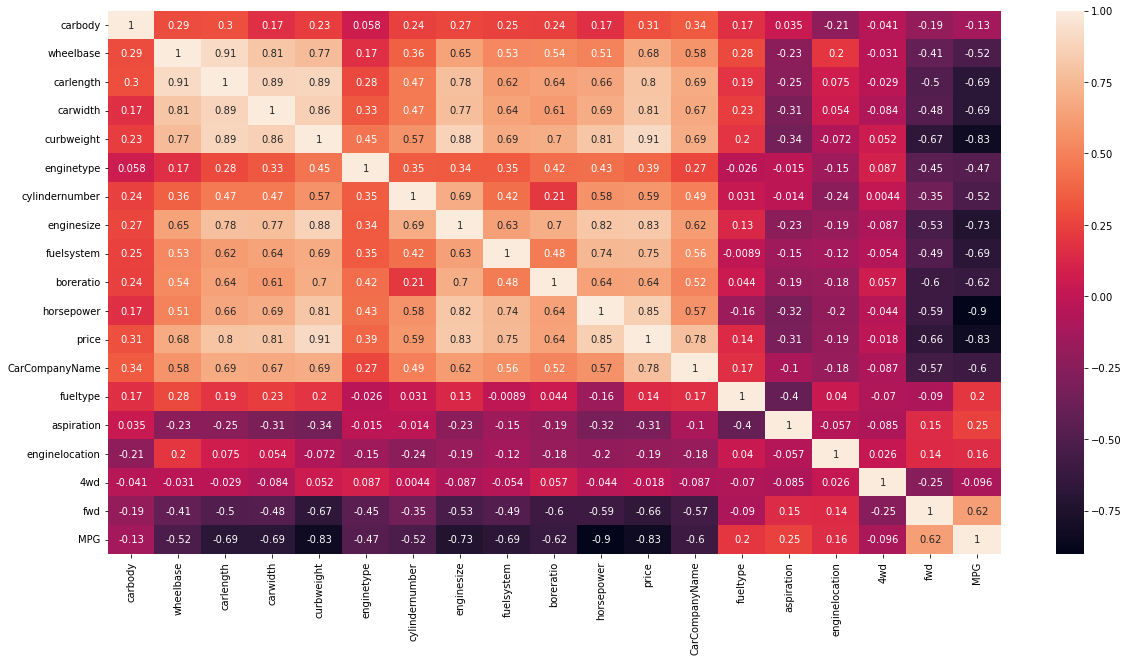

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr( method = 'spearman') , annot = True )
plt.show()

#### Price 
 - Considering grater than as highly correlated 0.7 or less than -0.7 
 - positively correlated with wheelbase ,carlength,carwidth,curbweight,enginesize,fuelsystem,horsepower,CarcompanyName
 - negatively correlated with MPG

#### In sameway we can also see other variable are 
 1. positively correlated with each other like  horsepower,enginesize,carlength,carwidth,curbweight  
 2. Negatively correalted with MPG


#### VIF check to confirm on correlation
##### Scaling - standardization of the data

In [28]:
def scaling(df):
    x = df.drop('price',axis = 1)
    y = df['price']
    scaler = StandardScaler()
    x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
    return x,y

In [29]:
def vif(x):
    ml = pd.DataFrame(columns = ['Features','VIF'])
    l=[]
    for i in range(len(x.columns)):
        l.append(VIF(x.values,i))
    ml['Features'] = x.columns
    ml['VIF'] = l
    return(ml.sort_values(by = 'VIF' , ascending = False))

In [30]:
x,y = scaling(df)
vif_score = vif(x)
vif_score

,Features,VIF
4,curbweight,21.796463
7,enginesize,14.440737
10,horsepower,10.895380
2,carlength,10.469987
6,cylindernumber,7.228549
1,wheelbase,7.082897
3,carwidth,6.203402
17,MPG,6.091140
11,CarCompanyName,3.772186
12,fueltype,3.217288


#### creating one feature out of carwidth, carlength, curbweight - As all related to car size and these are highly correlated.

In [31]:
df['car_size'] = ((df['carwidth'].mean() * df['carwidth'])+
             (df['carlength'].mean() * df['carlength'])+
             (df['curbweight'].mean() * df['curbweight']))/(
    df['carwidth'].mean()+df['carlength'].mean()+df['curbweight'].mean())
df.drop(columns = ['carwidth' ,'carlength' , 'curbweight'] , inplace = True)
df.head()

,carbody,wheelbase,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price,CarCompanyName,fueltype,aspiration,enginelocation,4wd,fwd,MPG,car_size
0,21890.500000,88.6,18116.416667,2.0,130,17754.60284,3.47,111,13495.0,15498.333333,0,1,1,0,0,24.296496,2341.310078
1,21890.500000,88.6,18116.416667,2.0,130,17754.60284,3.47,111,16500.0,15498.333333,0,1,1,0,0,24.296496,2341.310078
2,10376.652386,94.5,25098.384615,4.0,152,17754.60284,2.68,154,16500.0,15498.333333,0,1,1,0,0,22.845912,2592.887553
3,14344.270833,99.8,11574.048426,2.0,109,17754.60284,3.19,102,13950.0,17859.166714,0,1,1,0,1,27.296496,2148.956655
4,14344.270833,99.4,11574.048426,3.0,136,17754.60284,3.19,115,17450.0,17859.166714,0,1,1,1,0,20.197664,2594.159139


In [32]:
df.to_csv("Prescale_car_price.csv")

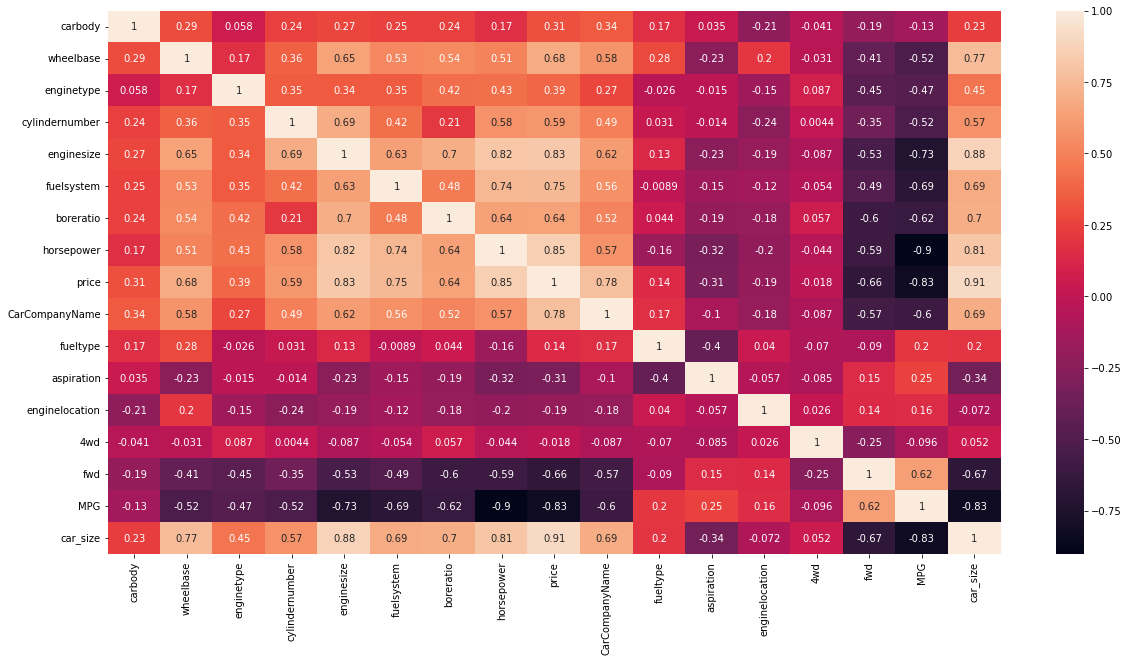

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr( method = 'spearman') , annot = True )
plt.show()

#### Car size have correlation with many features as wee see in heatmap and also have high VIF Score which imploes multi co linearity  and why it have many correlations in heat map

In [34]:
x,y = scaling(df)
vif_score = vif(x)
vif_score

,Features,VIF
15,car_size,17.095565
4,enginesize,13.832282
7,horsepower,10.393055
3,cylindernumber,7.193141
14,MPG,5.891420
1,wheelbase,4.453297
8,CarCompanyName,3.507790
9,fueltype,3.131739
6,boreratio,3.039300
13,fwd,2.551391


#### Lets drop the car_size,enginesize,horsepower which have most VIF

In [35]:
df.drop(columns = ['car_size','enginesize','horsepower'] , inplace = True)
x,y = scaling(df)
vif_score = vif(x)
vif_score

,Features,VIF
12,MPG,3.950388
3,cylindernumber,3.257810
6,CarCompanyName,3.248635
1,wheelbase,2.724484
11,fwd,2.365356
2,enginetype,2.320257
7,fueltype,2.203004
5,boreratio,2.128557
4,fuelsystem,2.073630
9,enginelocation,1.637114


#### Test - Train Split

In [61]:
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.2, random_state = 17 )

#### Linear Regression

In [62]:
linear = LinearRegression()
linear.fit(x_train,y_train)
print("R2 Score for Linear Regression with training data : {}".format(round(linear.score(x_train , y_train),2)))
print("R2 Score for Linear Regression with Unseen data : {}".format(round(linear.score(x_test , y_test),2)))

R2 Score for Linear Regression with training data : 0.91
R2 Score for Linear Regression with Unseen data : 0.88


In [38]:
lasso = Lasso()
lasso.fit(x_train,y_train)
print("R2 Score for Lasso Regression with training data : {}".format(round(lasso.score(x_train , y_train),2)))
print("R2 Score for Lasso Regression with Unseen data : {}".format(round(lasso.score(x_test , y_test),2)))

R2 Score for Lasso Regression with training data : 0.91
R2 Score for Lasso Regression with Unseen data : 0.88


In [39]:
ridge = Ridge()
ridge.fit(x_train,y_train)
print("R2 Score for Ridge Regression with training data : {}".format(round(ridge.score(x_train , y_train),2)))
print("R2 Score for Ridge Regression with Unseen data: {}".format(round(ridge.score(x_test , y_test),2)))

R2 Score for Ridge Regression with training data : 0.91
R2 Score for Ridge Regression with Unseen data: 0.88


#### Ridge and Lasso both give same level of R2 Score as Linear so lets move forward with simple linear model itself

#### Residual should be normal - assumption satisfy as we have approximatelt normal

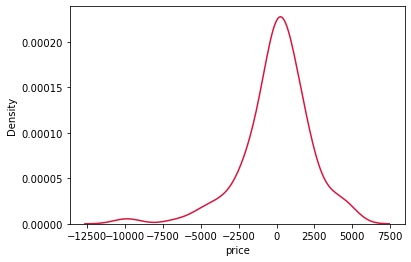

In [40]:
residual_linear = linear.predict(x_train) - y_train
sns.kdeplot(residual_linear  ,color='crimson')
plt.show()

####  Polynomial Features in Linear Regression
 - As per the Score its clear that Feature 1 is best fit

In [41]:
score_train = []
score_test = []
for i in range(1,4):
    poly = PolynomialFeatures(i)
    x_train = poly.fit_transform(x_train)
    x_test = poly.fit_transform(x_test)
    linear.fit(x_train,y_train)
    score_train.append(linear.score(x_train,y_train))
    score_test.append(linear.score(x_test,y_test))
print(score_train)
print(score_test)

[0.9103164093846519, 0.8703052936905012, 0.995008543460717]
[0.8757149632041978, -4.133304344046771e+22, -3.785403628194803e+18]
